In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Chargement des fichiers de données :

prices_pd = pd.read_csv("data-01/Weed_Price.csv", parse_dates=[-1])
demography_pd = pd.read_csv("data-01/Demographics_State.csv")
population_pd = pd.read_csv("data-01/Population_State.csv")

In [9]:
# 15 premières lignes de prices_pd
prices_pd.head(15)


State   HighQ  HighQN    MedQ  MedQN    LowQ  LowQN  \
0                Alabama  339.06    1042  198.64    933  149.49    123   
1                 Alaska  288.75     252  260.60    297  388.58     26   
2                Arizona  303.31    1941  209.35   1625  189.45    222   
3               Arkansas  361.85     576  185.62    544  125.87    112   
4             California  248.78   12096  193.56  12812  192.92    778   
5               Colorado  236.31    2161  195.29   1728  213.50    128   
6            Connecticut  347.90    1294  273.97   1316  257.36     91   
7               Delaware  373.18     347  226.25    273  199.88     34   
8   District of Columbia  352.26     433  295.67    349  213.72     39   
9                Florida  306.43    6506  220.03   5237  158.26    514   
10               Georgia  332.21    3099  213.52   2269  153.45    229   
11                Hawaii  310.96     328  270.38    350  160.46     25   
12                 Idaho  276.05     315  254.96    445  132.61     20   
13              Illinois  359.74    4008  287.23   3644  181.25    329   
14               Indiana  336.80    1665  206.24   1446  154.05    248   

         date  
0  2014-01-01  
1  2014-01-01  
2  2014-01-01  
3  2014-01-01  
4  2014-01-01  
5  2014-01-01  
6  2014-01-01  
7  2014-01-01  
8  2014-01-01  
9  2014-01-01  
10 2014-01-01  
11 2014-01-01  
12 2014-01-01  
13 2014-01-01  
14 2014-01-01

In [10]:
# 7 dernières lignes de prices_pd
prices_pd.tail(7)


State   HighQ  HighQN    MedQ  MedQN  LowQ  LowQN       date
22892           Utah  290.42     959  238.08   1055   NaN     62 2014-12-31
22893        Vermont  371.23     357  308.86    367   NaN     32 2014-12-31
22894       Virginia  364.98    3513  293.12   3079   NaN    284 2014-12-31
22895     Washington  233.05    3337  189.92   3562   NaN    160 2014-12-31
22896  West Virginia  359.35     551  224.03    545   NaN     60 2014-12-31
22897      Wisconsin  350.52    2244  272.71   2221   NaN    167 2014-12-31
22898        Wyoming  322.27     131  351.86    197   NaN     12 2014-12-31

Les types des données peuvent être récupérés à travers la méthode <tt>dtypes</tt>:

In [11]:
prices_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

Il y a beaucoup de fonction s à découvrir pour obtenir des informations utiles sur les DataFrames. Par exemple, la liste des états peut être obtenue ainsi:


In [12]:
les_etats = np.unique(prices_pd["State"].values)

In [13]:
# Afficher la liste des états :
print(les_etats)


['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [16]:
print(len(prices_pd["MedQ"].values))
print(len(np.unique(prices_pd["MedQ"].values)))

22899
7776


**Moyennes sur les qualités**

* La moyenne des prix pour les qualités medium et high
* La moyenne des prix pour les qualités medium et high dans l'état de ''New York''

In [27]:
print("La moyenne (MedQ) est : %f dollars" % prices_pd["MedQ"].mean())
print("La moyenne (HighQ) est : %f dollars" % prices_pd["HighQ"].mean())

prices_ny_pd = prices_pd[prices_pd['State'] == 'New York']
print("La moyenne (MedQ) est : %f dollars" % prices_ny_pd["MedQ"].mean())
print("La moyenne (HighQ) est : %f dollars" % prices_ny_pd["HighQ"].mean())

La moyenne (MedQ) est : 247.618306 dollars
La moyenne (HighQ) est : 329.759854 dollars
La moyenne (MedQ) est : 265.376949 dollars
La moyenne (HighQ) est : 346.912762 dollars


**Moyenne sur les états**

La moyenne des prix qualités medium et high dans tous les états -- la liste des états est obtenues ainsi states=np.unique(prices_pd["State"].values)

In [81]:
def moyenne_price_state(valeurs,Quality):
    states = np.unique(valeurs["State"].values)
    
    for i in states:
        prices_state_pd = valeurs[valeurs['State'] == i]
        
        moy = moyenne(prices_state_pd[Quality])
        
    
        print(i,moy)
        

groupe = prices_pd.groupby('State')

moyenne_price_state(prices_pd,"MedQ")
print(groupe["MedQ"].mean())


Alabama 204.60616926503337
Alaska 262.0463919821821
Arizona 209.3653452115812
Arkansas 190.4146547884188
California 191.26890868596863
Colorado 196.5325167037864
Connecticut 271.323897550111
Delaware 231.23031180400875
District of Columbia 288.2513140311806
Florida 217.88256124721573
Georgia 215.94363028953245
Hawaii 268.73815144766115
Idaho 249.82242761692677
Illinois 284.18008908685954
Indiana 211.9895100222718
Iowa 289.9455233853002
Kansas 261.24307349665946
Kentucky 179.93376391982198
Louisiana 243.11788418708247
Maine 248.43817371937624
Maryland 254.14044543429824
Massachusetts 290.1978841870826
Michigan 273.3523385300668
Minnesota 275.85006681514506
Mississippi 148.23160356347432
Missouri 244.81220489977727
Montana 248.39855233853018
Nebraska 248.16064587973275
Nevada 226.21741648106928
New Hampshire 290.10775055679323
New Jersey 288.72701559020027
New Mexico 209.24224944320733
New York 265.37694877505584
North Carolina 245.69922048997807
North Dakota 349.0666815144772
Ohio 216.9

**Modification de données**

Remplacement du <tt>NAN</tt> de la colonne <tt>LowQ</tt> 


In [83]:
prices_sorted = prices_pd.sort_values(by=['State', 'date'], inplace=False)
prices_sorted.head()

#Inplace = true -> Ecrasement de la liste sur laquelle on travail. Elle devient sorted by... etc
#Inplace = false -> Retour de la copie du tableau sorted by ... etc

State   HighQ  HighQN    MedQ  MedQN    LowQ  LowQN       date
20094  Alabama  339.65    1033  198.04    926  147.15    122 2013-12-27
20859  Alabama  339.65    1033  198.04    926  147.15    122 2013-12-28
21573  Alabama  339.75    1036  198.26    929  149.49    123 2013-12-29
22287  Alabama  339.75    1036  198.81    930  149.49    123 2013-12-30
22797  Alabama  339.42    1040  198.68    932  149.49    123 2013-12-31

<font color="RED" size="+1">**[Q]**</font> **Changements des résultats**


Recalculer la moyenne des prix pour la qualité <tt>Low</tt>. Qu'en est-il maintenant ? 

In [84]:
moyenne_price_state(prices_pd,"LowQ")

groupe = prices_pd.groupby('State')
print(groupe["LowQ"].mean())

Alabama nan
Alaska nan
Arizona nan
Arkansas nan
California nan
Colorado nan
Connecticut nan
Delaware nan
District of Columbia nan
Florida nan
Georgia nan
Hawaii nan
Idaho nan
Illinois nan
Indiana nan
Iowa nan
Kansas nan
Kentucky nan
Louisiana nan
Maine nan
Maryland nan
Massachusetts nan
Michigan nan
Minnesota nan
Mississippi nan
Missouri nan
Montana nan
Nebraska nan
Nevada nan
New Hampshire nan
New Jersey nan
New Mexico nan
New York nan
North Carolina nan
North Dakota nan
Ohio nan
Oklahoma nan
Oregon nan
Pennsylvania nan
Rhode Island nan
South Carolina nan
South Dakota nan
Tennessee nan
Texas nan
Utah nan
Vermont nan
Virginia nan
Washington nan
West Virginia nan
Wisconsin nan
Wyoming nan
State
Alabama                 146.832603
Alaska                  387.232727
Arizona                 190.826860
Arkansas                127.345455
California              190.795992
Colorado                226.790620
Connecticut             253.024876
Delaware                205.045992
District of Colum

On peut faire cela de la manière suivante avec Pandas:

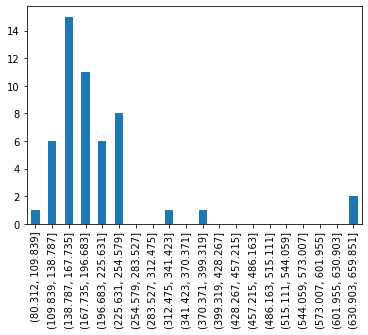

In [4]:
prix_moyens=prices_pd[["State","LowQ"]].groupby(["State"]).mean()
prix_moyens=prix_moyens.values.ravel()

effectif=pd.cut(prix_moyens,20)
effectif2=pd.value_counts(effectif)
effectif3=effectif2.reindex(effectif.categories)
effectif3.plot(kind='bar')
plt.show()

Et comme cela avec Numpy:

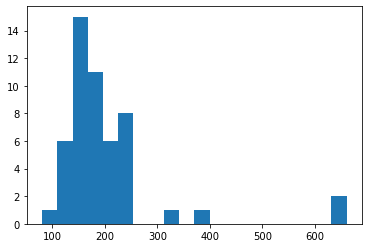

In [5]:
plt.hist(prix_moyens,bins=20)
plt.show()

L'estimation de densité en pandas peut se faire ainsi

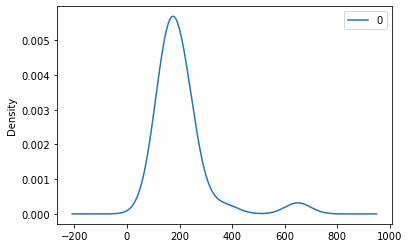

In [6]:
effectif=pd.DataFrame(prix_moyens)
effectif.plot(kind='kde')
plt.show()

<font color="RED" size="+1">**[Q]**</font> **Quartiles**

Ecrire la fonction Q(alpha,x,y) qui permet de trouver le quartile(alpha,x,y).
- quartile(0.5,x,densite) correspondra à la médiane. 

Calculer et représenter graphiquement le boxplot.

Remarque: un boxplot en pandas se fait ainsi:
        
    a=pd.DataFrame(prix_moyens)
    a.boxplot()


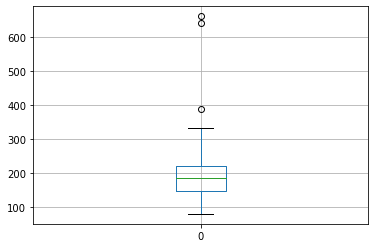

In [8]:
a=pd.DataFrame(prix_moyens)
a.boxplot()
plt.show()

### Variance

On ajoute <tt>HighQ_var</tt> aux données originales contenant la variance des prix par état.


In [9]:
states = np.unique(prices_pd["State"].values)
test_pd = pd.read_csv("data-01/Weed_Price.csv", parse_dates=[-1])

test_pd.insert(2,column = "HighQ_Var",value = None)
for i in states:
    prices_state_pd = prices_pd[prices_pd['State'] == i]
        
    res = prices_state_pd.loc[:,"HighQ"].var()
    
    
    
    test_pd.loc[(test_pd['State'] == i),"HighQ_Var"] = res
    
test_pd.head(5)

State   HighQ HighQ_Var  HighQN    MedQ  MedQN    LowQ  LowQN  \
0     Alabama  339.06   2.37075    1042  198.64    933  149.49    123   
1      Alaska  288.75   31.1376     252  260.60    297  388.58     26   
2     Arizona  303.31   4.06325    1941  209.35   1625  189.45    222   
3    Arkansas  361.85    47.142     576  185.62    544  125.87    112   
4  California  248.78   2.98269   12096  193.56  12812  192.92    778   

        date  
0 2014-01-01  
1 2014-01-01  
2 2014-01-01  
3 2014-01-01  
4 2014-01-01

In [341]:
prices_pd.describe()

HighQ        HighQN          MedQ         MedQN          LowQ  \
count  22899.000000  22899.000000  22899.000000  22899.000000  12342.000000   
mean     329.759854   2274.743657    247.618306   2183.737805    203.747847   
std       41.173167   2641.936586     44.276015   2789.902626    105.480774   
min      202.020000     93.000000    144.850000    134.000000     63.700000   
25%      303.780000    597.000000    215.775000    548.000000    147.117500   
50%      342.310000   1420.000000    245.800000   1320.000000    186.760000   
75%      356.550000   2958.000000    274.155000   2673.000000    221.360000   
max      415.700000  18492.000000    379.000000  22027.000000    734.650000   

              LowQN  
count  22899.000000  
mean     202.804489  
std      220.531987  
min       11.000000  
25%       51.000000  
50%      139.000000  
75%      263.000000  
max     1287.000000

**Matrice de corrélation**


Nous allons maintenant nous intéresser à calculer la corrélation entre les prix à New York et les prix en Californie.

In [342]:
prix_ny=prices_pd[prices_pd['State']=='New York']
prix_ca=prices_pd[prices_pd['State']=='California']
prix_ca_ny=prix_ca.merge(prix_ny,on='date')
prix_ca_ny.head()

# Exécuter cette boîte et commenter le résultat obtenu
# Permet de comparer des valeurs en fonction d'un paramètre en commun

State_x  HighQ_x  HighQN_x  MedQ_x  MedQN_x  LowQ_x  LowQN_x       date  \
0  California   248.78     12096  193.56    12812  192.92      778 2014-01-01   
1  California   243.96     16512  189.35    19151     NaN     1096 2015-01-01   
2  California   248.20     12571  192.80    13406  191.94      804 2014-02-01   
3  California   243.30     16904  188.95    19764     NaN     1123 2015-02-01   
4  California   247.60     12988  192.97    13906  191.40      839 2014-03-01   

    State_y  HighQ_y  HighQN_y  MedQ_y  MedQN_y  LowQ_y  LowQN_y  
0  New York   351.98      5800  268.88     5824  190.38      482  
1  New York   343.80      7840  263.56     8716     NaN      616  
2  New York   352.35      6051  268.50     6115  190.16      497  
3  New York   343.09      8058  262.93     9015     NaN      628  
4  New York   351.18      6209  267.69     6356  189.64      507

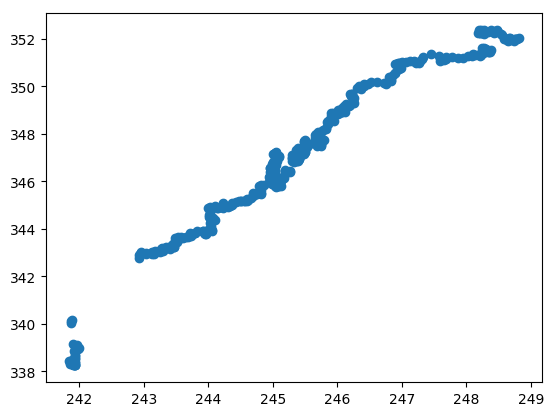

In [392]:
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = prix_ca_ny["HighQ_x"].values
y = prix_ca_ny["HighQ_y"].values

x1 = x.tolist()
y1 = y.tolist()

colors = np.random.rand(N)

plt.scatter(x1, y1)
plt.show()

In [10]:
def correlation(x,y):
    res = (np.corrcoef(x, y))
    
    return res[0][1]

In [398]:
print("La correlation est de :%f"%correlation(prix_ca_ny["HighQ_x"].values,prix_ca_ny["HighQ_y"].values))

La correlation est :0.979044
